<center><h2><b>PROJECT 2</b></h2></center><center><h3><b>MSDS 6371 - 403</b></h3></center><center><h3><b>Data Mining</b></h3></center>

<h4><b>Team Members:</b></h4>
<ul>
  <li>Lisa Mendez</li>
  <li>Brandon Lawrence</li>
  <li>Mariana Llamas-Cendon</li>
  <li>Dominique Edwards</li>
</ul>

<h2><b><center> Data Preparation (15 points total)</center></b></h2> 



## NOTE:
The notebook must be run from the beginning to ensure all of the variable values hold their value in order for the cells to run appropriately.

<h3><b>[10 points]</b>

*Define and prepare your class variables. Use proper variable
representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for
the analysis.*

#### For this project we are using the cleaned version of the data set ('accident.xlsx') we have derived for Project1 and used in the Mini-Lab, because we have already deleted those attributes that had more than 50% of missing or unknown values, plus some other attributes that we considered did not provide any useful information for our analysis. 

For this project our intention is to classify and determine which elements directly contribute to the probability that a death (or several deaths) will happen in an accident--for Task 1--, and the hour frame in which an accident having fatalities involved is more likely to occur--for Task 2--and based on this we will try to reduce noise caused by other attributes that we believe do not contribute to the analysis. We will also create two different dataframes that directly relate to the tasks we will be performing: a) predicting single or multiple fatalities in an accident; b) predicting the hour in which fatalities occurred.

In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import pandas as pd
from pandas import DataFrame
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_accident = pd.read_excel('accident_clean.xlsx')
df_accident.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR,DATETIME
0,1,10001,1,1,0,0,0,1,1,127.0,...,0.0,1.0,1.0,0,4.0,2.0,1.0,1,1,2015-01-01
1,1,10002,1,1,0,0,0,1,1,83.0,...,0.0,1.0,1.0,0,3.0,2.0,10.0,1,0,2015-01-01
2,1,10003,1,1,0,0,0,2,2,11.0,...,0.0,1.0,1.0,0,4.0,2.0,1.0,1,1,2015-01-01
3,1,10004,1,1,0,0,0,1,1,45.0,...,0.0,1.0,1.0,0,4.0,2.0,10.0,1,1,2015-01-04
4,1,10005,2,2,0,0,0,2,2,45.0,...,0.0,2.0,3.0,0,1.0,1.0,1.0,1,0,2015-01-07


In [3]:
print ('The number of rows is       ', df_accident.shape[0])
print ('The number of attributes is ', df_accident.shape[1])

('The number of rows is       ', 30828)
('The number of attributes is ', 33)


#### Deletion of variables not relevant to analysis

As mentioned prior, we will focus this analysis on those attributes that directly impact our response variable **FATALS**--which later will be used to derive a new response variable named **FATALITIES** which will only contain two classes: 0, for single fatality accidents and 1, for multiple deaths in  motor vehicle accidents. 

In this context, in which are main interest resides in understanding the conditions that could allow us to predict the probability in which an accident can result in one or multiple fatalities, we decided to drop attributes that a) can be derived from other attributes, and b) do not provide information regarding what could have caused someone to die in the event of an accident. These attributes are:

<li>**ST_CASE**   *--a unique identifier for each report of an accident ( this does not contain information regarding whether fatalities occur);*</li>
<li>**COUNTY**    *--represents the identifying codes of each of the counties where an accident took place, this attribute could allow us to discern those counties in which fatalities occur but cannot help us to determine the cause and therefore predict the likelihood of a death or deaths in an accident. *</li>
<li>**SP_JUR**    *--identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction or not. Considering that there are about 30,560 instances of class 0 (No Special Jurisdiction), this attribute only adds noise and not much information as information about this can be obtained from attribute **ROUTE**.*</li>
<li>**RD_OWNER**  *-- This attribute is pretty much similar to that named **ROUTE**, only that in here the route is identified with a particular agency, whether Federal, State, or Local*.</li>
<li>**RUR_URB**   *-- this attribute identifies if the road where the accident had ocurred is rural or urban, but that information can be derived from the attribute **ROUTE** *. 
<li>**LONGITUD**  *--This element identifies the location of the crash using Global Position coordinates. At this point we are more interested in where and how a death in an crash occur than knowing the exact coordinates where it happened.*<li>
<li>**LATITUDE**  *--same as above.*</li>
<li>**STATE**     *-- For this particular analysis we are interested in determining what factors contribute in people dying during an accident, not so much in comparing where it happened.*</li>
<li>**FUNC_SYS**  *--This element describe the type of road where an accident happened. Thi information can be obtained from **ROUTE**.</li>
<li> **TYP_INT**  *--This data element identifies and allows separation of various intersection types but can derived from **RELJCT2**, which identifies the crash's location with respect to presence in or
proximity to components typically in junction or interchange areas.</li>
<li> **NHS**      *--This data element identifies whether this crash occurred on a trafficway that is part
of the National Highway System. We can obtain this information from **ROUTE** attribute.*</li>
<li> **TWAY_ID**  *-- This data element records the trafficway on which the crash occurred. This information can be derived from **ROUTE** attribute.*</li>
<li> **DATETIME** *-- this one because its type datetime had caused us problems in other projects particularly with the PCA analysis, which we will run again. 

A new dataframe named **df_reduced** will be created to store the new data.

In [4]:
# Create new dataframe "df_reduced" to store new data from df_accident
df_reduced = df_accident
# Drop afore mentioned attributes from dataframe df_reduced
df_reduced.drop('ST_CASE', axis= 1, inplace =True)
df_reduced.drop('COUNTY', axis= 1, inplace =True)
df_reduced.drop('SP_JUR', axis= 1, inplace =True)
df_reduced.drop('RD_OWNER', axis= 1, inplace =True)
df_reduced.drop('RUR_URB', axis= 1, inplace =True)
df_reduced.drop('LONGITUD', axis= 1, inplace =True)
df_reduced.drop('LATITUDE', axis= 1, inplace =True)
df_reduced.drop('STATE', axis= 1, inplace =True)
df_reduced.drop('FUNC_SYS', axis= 1, inplace =True)
df_reduced.drop('TYP_INT', axis= 1, inplace =True)
df_reduced.drop('NHS', axis= 1, inplace =True)
df_reduced.drop('TWAY_ID', axis= 1, inplace =True)
df_reduced.drop('DATETIME', axis = 1, inplace = True)

In [5]:
df_reduced.describe()

,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,HOUR,ROUTE,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30603.000000,29558.000000,30811.000000,30759.000000,30816.000000,30788.000000,30828.000000,30787.000000,30678.000000,30572.000000,30828.000000,30828.000000
mean,1.560335,1.525139,0.035195,0.213605,0.222687,2.290742,2.299825,4.101661,12.809202,3.381724,18.107819,1.589356,0.043257,2.001072,0.034968,2.197031,1.821338,2.742313,1.091475,0.281984
std,0.896586,0.860262,0.264386,0.481211,0.508731,1.957052,1.961892,2.090714,6.868348,1.613226,13.944029,2.506745,0.203438,2.833917,0.298258,1.583026,0.973719,3.397831,0.367088,0.466398
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,7.000000,2.000000,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,14.000000,3.000000,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.000000,19.000000,4.000000,30.000000,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,58.000000,58.000000,11.000000,16.000000,16.000000,93.000000,93.000000,7.000000,23.000000,7.000000,73.000000,11.000000,1.000000,20.000000,4.000000,11.000000,5.000000,12.000000,10.000000,3.000000


In [6]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

('The number of rows is       ', 30828)
('The number of attributes is ', 20)


In [7]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30828 entries, 0 to 32165
Data columns (total 20 columns):
VE_TOTAL      30828 non-null int64
VE_FORMS      30828 non-null int64
PVH_INVL      30828 non-null int64
PEDS          30828 non-null int64
PERNOTMVIT    30828 non-null int64
PERMVIT       30828 non-null int64
PERSONS       30828 non-null int64
DAY_WEEK      30828 non-null int64
HOUR          30603 non-null float64
ROUTE         29558 non-null float64
HARM_EV       30811 non-null float64
MAN_COLL      30759 non-null float64
RELJCT1       30816 non-null float64
RELJCT2       30788 non-null float64
WRK_ZONE      30828 non-null int64
REL_ROAD      30787 non-null float64
LGT_COND      30678 non-null float64
WEATHER       30572 non-null float64
FATALS        30828 non-null int64
DRUNK_DR      30828 non-null int64
dtypes: float64(9), int64(11)
memory usage: 4.9 MB


#### Deletion of observations from certain attributes based on a cutoff of 10.

We will delete those levels from attribute **HARM_EV**-- which describes the first injury or damage producing event of the crash-- than contain less than 10 events. 

In [8]:
df_reduced.HARM_EV.value_counts()

12.0    11791
8.0      4724
1.0      2668
42.0     2211
33.0     1045
34.0      935
35.0      884
9.0       772
24.0      715
30.0      650
32.0      405
59.0      397
38.0      376
14.0      337
31.0      279
53.0      257
25.0      251
43.0      251
5.0       204
11.0      174
52.0      165
18.0      144
15.0      139
23.0       92
21.0       88
10.0       87
39.0       78
58.0       76
19.0       65
17.0       64
57.0       60
26.0       48
3.0        46
41.0       45
46.0       37
20.0       34
7.0        32
16.0       31
54.0       24
48.0       23
44.0       22
40.0       20
49.0       17
45.0       13
51.0       10
2.0         9
50.0        9
73.0        3
72.0        3
6.0         1
Name: HARM_EV, dtype: int64

After looking at the frequencies for each of the 73 levels of the attribute **HARM_EV**, the following levels that do not contain at least 10 observations will be deleted:
<ul>
<li>-- **2**  *(Fire/Explosion)*</li>
<li>-- **6**  *(Injured in Vehicle (Non-Collision))*</li>
<li>-- **50** *(Bridge Overhead Structure)*</li>
<li>-- **73** *(Object Fell From Motor Vehicle In-Transport)*</li>
<li>-- **72** *(Cargo/Equipment Loss or Shift (Harmful to This Vehicle))*</li>

In [9]:
# Delete levels that do not have at least 10 observations
df_reduced = df_reduced[df_reduced.HARM_EV != 2]
df_reduced = df_reduced[df_reduced.HARM_EV != 50]
df_reduced = df_reduced[df_reduced.HARM_EV != 73]
df_reduced = df_reduced[df_reduced.HARM_EV != 72]
df_reduced = df_reduced[df_reduced.HARM_EV != 6]

Now, we will delete the levels of those categorical variables that have less than 10 observations. 
<li> **RELJCT2** *-- delete levels 16 (Shared-Use Path Crossing) and 17 (Acceleration/Deceleration Lane)*</li>
<li> **WRK_ZONE** *-- delete level 3 (Utility)*</li>

In [10]:
df_reduced = df_reduced[df_reduced.RELJCT2 != 16] # 
df_reduced = df_reduced[df_reduced.RELJCT2 != 17]
df_reduced = df_reduced[df_reduced.WRK_ZONE != 3]

Only 18 observations we deleted from those levels of the categorical attributes that did not have at least 10 observations.

In [11]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

('The number of rows is       ', 30782)
('The number of attributes is ', 20)


In [12]:
# Check for missing values, we expect those to be in the categorical variables but not the continuous ones
df_reduced.isnull().any()

VE_TOTAL      False
VE_FORMS      False
PVH_INVL      False
PEDS          False
PERNOTMVIT    False
PERMVIT       False
PERSONS       False
DAY_WEEK      False
HOUR           True
ROUTE          True
HARM_EV        True
MAN_COLL       True
RELJCT1        True
RELJCT2        True
WRK_ZONE      False
REL_ROAD       True
LGT_COND       True
WEATHER        True
FATALS        False
DRUNK_DR      False
dtype: bool

None of the continuous variables have missing values:

<li> **VE_TOTAL**</li>
<li> ** VE_FORMS**</li>
<li> ** PVH_INVL**</li>
<li> **PEDS**</li>
<li> **PERNOTMVIT**</li>
<li> **PERMVIT**</li>
<li> **PERSONS**</li>
<li> **FATALS**</li>
<li> **DR_DRIVER**</li>


Imputation cannot be performed on categorical attributes, and <a href="https://pandas.pydata.org/pandas-docs/stable/missing_data.html">Pandas</a> treats missing values as zero, so deleting missing values from dataframe is the best option. 

So in the following two cells, we will get rid of missing values from the whole data set, and then check that the missing values are in fact out. 

In [13]:
# Drop missing values from data set
df_reduced.dropna(inplace = True)

In [14]:
# Check that missing values are in fact gone
df_reduced.isnull().any()

VE_TOTAL      False
VE_FORMS      False
PVH_INVL      False
PEDS          False
PERNOTMVIT    False
PERMVIT       False
PERSONS       False
DAY_WEEK      False
HOUR          False
ROUTE         False
HARM_EV       False
MAN_COLL      False
RELJCT1       False
RELJCT2       False
WRK_ZONE      False
REL_ROAD      False
LGT_COND      False
WEATHER       False
FATALS        False
DRUNK_DR      False
dtype: bool

The number of missing values eliminated was 1857, which accounts for about 6% of the data. 

In [15]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

('The number of rows is       ', 28953)
('The number of attributes is ', 20)


#### Defining attribute's type

The categorical attributes from the original data set were recorded as integers not floats, although in cell #7 we can see that many of the categoricals were read as floats for an unknown reason. For the sake of consistency, we will coerce floats to integers. This was not performed previously because presence of missing values prevented us from doing so.

In [16]:
# coerce floats to int
df_reduced['HOUR'] = df_reduced.HOUR.astype(int)
df_reduced['ROUTE'] = df_reduced.ROUTE.astype(int)
df_reduced['HARM_EV'] = df_reduced.HARM_EV.astype(int)
df_reduced['MAN_COLL'] = df_reduced.MAN_COLL.astype(int)
df_reduced['RELJCT1'] = df_reduced.RELJCT1.astype(int)
df_reduced['RELJCT2'] = df_reduced.RELJCT2.astype(int)
df_reduced['REL_ROAD'] = df_reduced.REL_ROAD.astype(int)
df_reduced['LGT_COND'] = df_reduced.LGT_COND.astype(int)
df_reduced['WEATHER'] = df_reduced.WEATHER.astype(int)

In [17]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28953 entries, 0 to 32165
Data columns (total 20 columns):
VE_TOTAL      28953 non-null int64
VE_FORMS      28953 non-null int64
PVH_INVL      28953 non-null int64
PEDS          28953 non-null int64
PERNOTMVIT    28953 non-null int64
PERMVIT       28953 non-null int64
PERSONS       28953 non-null int64
DAY_WEEK      28953 non-null int64
HOUR          28953 non-null int32
ROUTE         28953 non-null int32
HARM_EV       28953 non-null int32
MAN_COLL      28953 non-null int32
RELJCT1       28953 non-null int32
RELJCT2       28953 non-null int32
WRK_ZONE      28953 non-null int64
REL_ROAD      28953 non-null int32
LGT_COND      28953 non-null int32
WEATHER       28953 non-null int32
FATALS        28953 non-null int64
DRUNK_DR      28953 non-null int64
dtypes: int32(9), int64(11)
memory usage: 3.6 MB


After the coercion, we can see that all of the attributes now are of type int as opposed to float. 

#### Properly Indexing dataframe

For an unknown reason, the index of the whole data set was set to start at 0 as opposed to 1, so it was necessary for our own understanding to switch it back to starting at 1. 

In [18]:
#change index to start at 1 not 0
df_reduced.index = np.arange(1, len(df_reduced)+1)

#### Encoding categorical variables

We will use one-hot encoding to turn categorical variables with several levels to dummies. This will not affect those that are already binary such as **RELJCT1**, which values are 0 and 1, but we expect a dramatic increase in the number of attributes considering that some of those categoricals have more than 20 levels.

In [19]:
# Create dummy variable from ROUTE attribute
route_df = pd.get_dummies(df_reduced.ROUTE,prefix='ROUTE')
df_reducedt = pd.concat((df_reduced, route_df), axis =1)

In [20]:
# Create dummy variable from HARM_EV attribute
harm_df = pd.get_dummies(df_reduced.HARM_EV,prefix='HARM_EV')
df_reduced = pd.concat((df_reduced, harm_df), axis =1)

In [21]:
# Create dummy variable from RELJCT2 attribute
reljct_df = pd.get_dummies(df_reduced.RELJCT2,prefix='RELJCT2')
df_reduced = pd.concat((df_reduced, reljct_df), axis =1)

In [22]:
# Create dummy variable from WRK_ZONE attribute
wrk_df = pd.get_dummies(df_reduced.WRK_ZONE,prefix='WRK_ZONE')
df_reduced = pd.concat((df_reduced, wrk_df), axis =1)

In [23]:
# Create dummy variable from REL_ROAD attribute
relrd_df = pd.get_dummies(df_reduced.REL_ROAD,prefix='REL_ROAD')
df_reduced = pd.concat((df_reduced, relrd_df), axis =1)

In [24]:
# Create dummy variable from LGT_COND attribute
lgt_df = pd.get_dummies(df_reduced.LGT_COND,prefix='LGT_COND')
df_reduced = pd.concat((df_reduced, lgt_df), axis =1)

In [25]:
# Create dummy variable from WEATHER attribute
wtr_df = pd.get_dummies(df_reduced.WEATHER,prefix='WEATHER')
df_reduced = pd.concat((df_reduced, wtr_df), axis =1)

In [26]:
# Create dummy variable from DAY_WEEK attribute
wk_df = pd.get_dummies(df_reduced.DAY_WEEK,prefix='DAY_WEEK')
df_reduced = pd.concat((df_reduced, wk_df), axis =1)

After the one-hot encoding of the above attributes, we delete those variables from which they were derived. 

In [27]:
# To clean df_accident, drop those attributes from which the dummy variables were derived
    
if 'ROUTE' in df_reduced:
    del df_reduced['ROUTE'] 

    
if 'HARM_EV' in df_reduced:
    del df_reduced['HARM_EV'] 
    
if 'RELJCT2' in df_reduced:
    del df_reduced['RELJCT2'] 

    
if 'WRK_ZONE' in df_reduced:
    del df_reduced['WRK_ZONE'] 
    
if 'REL_ROAD' in df_reduced:
    del df_reduced['REL_ROAD'] 
    
if 'LGT_COND' in df_reduced:
    del df_reduced['LGT_COND'] 
    
if 'WEATHER' in df_reduced:
    del df_reduced['WEATHER'] 
    

if 'DAY_WEEK' in df_reduced:
    del df_reduced['DAY_WEEK']
    
df_passenger = df_reduced.copy()

As expected, the number of attributes rose from 21 to 104. 

In [28]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

('The number of rows is       ', 28953)
('The number of attributes is ', 104)


#### Creation of new dataframe for Task 1

Considering that according to a 2009 report from <a href="https://www.forbes.com/2009/01/21/car-accident-times-forbeslife-cx_he_0121driving_slide_2.html?thisspeed=25000"> AAA published by Forbes</a>: "According to the IIHS, an average 6.6 people are killed between the hours of 5 p.m. and 6 p.m., and another 6.6 between the hours of 6 p.m. and 7 p.m. Those rates are the overall highest of any time during the day. In 2007, 14,055 people were killed in the 5 p.m. hour. But the hours between midnight and 4 a.m. have the highest number of fatalities when calculated as a percentage of the amount of people on the road, according to AAA. During that time, statistically speaking, 5.87 per 100 million people on the road will be killed."

Another report, from 2015, published by <a href="https://www.forbes.com/2009/01/21/car-accident-times-forbeslife-cx_he_0121driving_slide_2.html?thisspeed=25000"> Refinery29 based on data from the National Highway Traffic Safety Administration (NHTSA)</a>, states that crashes were fatalities are present tend to occur on the weekends between midnight and 3 a.m.

Based on this information, we will create a new dataframe called **df_task1** in which we will store the transformation of our attribute **HOUR** from continuous (from 0 to 23) to ordinal in the following way:

<li> **1** = 0-3 a.m. (when supposedly most of the crashes involving fatalities occur)</li>
<li> **2** = 4-7 a.m. (morning hours before hitting the road for most people)</li>
<li> **3** = 8-11 a.m. (rush hour to get to work)</li>
<li> **4** = 12-15 p.m. (lunch hour)</li>
<li> **5** = 16 - 19 p.m. (peak hour after work) </li>
<li> **6** = 20-23 (night time)</li>

Tried using pd.cut but could not get it to work the bins as we wanted, so we tried the harder way by creating a new column **HR_RANGE** derived from **HOUR**, which we will drop next.



In [29]:
df_task1 = df_reduced[df_reduced.columns[:104]]

df_task1['HR_RANGE'] = 0
df_task1['HR_RANGE'][df_task1['HOUR'] <=3] = 1
df_task1['HR_RANGE'][df_task1['HOUR'] ==4] = 2
df_task1['HR_RANGE'][df_task1['HOUR'] ==5] = 2
df_task1['HR_RANGE'][df_task1['HOUR'] == 6] = 2
df_task1['HR_RANGE'][df_task1['HOUR'] == 7] = 2
df_task1['HR_RANGE'][df_task1['HOUR'] == 8] = 3
df_task1['HR_RANGE'][df_task1['HOUR'] == 9] = 3
df_task1['HR_RANGE'][df_task1['HOUR'] == 10] = 3
df_task1['HR_RANGE'][df_task1['HOUR'] == 11] = 3
df_task1['HR_RANGE'][df_task1['HOUR'] == 12] = 4
df_task1['HR_RANGE'][df_task1['HOUR'] == 13] = 4
df_task1['HR_RANGE'][df_task1['HOUR'] == 14] = 4
df_task1['HR_RANGE'][df_task1['HOUR'] == 15] = 4
df_task1['HR_RANGE'][df_task1['HOUR'] == 16] = 5
df_task1['HR_RANGE'][df_task1['HOUR'] == 17] = 5
df_task1['HR_RANGE'][df_task1['HOUR'] == 18] = 5
df_task1['HR_RANGE'][df_task1['HOUR'] == 19] = 5
df_task1['HR_RANGE'][df_task1['HOUR'] == 20] = 6
df_task1['HR_RANGE'][df_task1['HOUR'] == 21] = 6
df_task1['HR_RANGE'][df_task1['HOUR'] == 22] = 6
df_task1['HR_RANGE'][df_task1['HOUR'] == 23] = 6

In [30]:
df_task1['HR_RANGE'] = df_task1.HR_RANGE.astype(int)

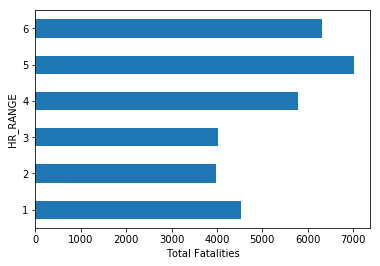

In [31]:
#df_reduced.plot(x='HR_RANGE', y = 'FATALS', kind = 'scatter')

df_HR= df_task1.groupby(by=['HR_RANGE'])

# Sum number of Fatalities
fatal_Week = df_HR.FATALS.sum()

# Graph Chart
plt.xlabel('Total Fatalities')
g_fatal_Week = fatal_Week.plot(kind='barh')

From the above plot we can see that the highest total number of fatalities are located on level 5 (between 16 and 19 hrs), followed by level 6 (from 20 to 23 hrs). We were expected based on the aforementioned reports that the level of the attribute **HR_RANGE** that will display the higher number of fatalities would be 1 (from 0 to 3 hrs). Nevertheless, our plot does support the findings of the AAA report in the sense that "peak hours" (from 16 to 19 hrs) are also those that overall represent the highest incidences of fatalities occurring during day time hours. 

In [32]:
df_task1.drop('HOUR', axis= 1, inplace =True)

As previously mentioned, the continuous attribute **FATALS** will be derived in a new binary variable called **FATALITIES**--our response variable for **Task 1**--, which classes will represent: 0 = single fatality; 1 = multiple fatalities. 
The attribute **FATALS** will be dropped from the dataframe **df_task1**. 


In [33]:
# Since our chosen response variable FATALS is continuous with values ranging from 1-99, transform it into a new binary attribute 'FATALITIES'
# Where 0 = single fatality and 1 = multiple fatalities. 
df_task1['FATALITIES'] = 0
df_task1['FATALITIES'][df_task1['FATALS'] == 1] = 0
df_task1['FATALITIES'][df_task1['FATALS'] > 1] = 1
df_task1['FATALITIES'].value_counts()

0    26795
1     2158
Name: FATALITIES, dtype: int64

It is quite obvious that the classes for our response variable are imbalanced with 7% corresponding to class 1 and 93% to class 0. 

In [34]:
# delete the original response variable from the dataframe so it won't influence results. 
if 'FATALS' in df_task1:
    del df_task1['FATALS'] 

Now, we will separate our explanatory variables, which we will call **X**, and our response variable **FATALITIES**, which now will be called **y** from our df_reduced dataframe. This way when performing a dimensionality reduction using PCA, considering that our dataframe has 104 columns, the response variable will not be included. 

In [35]:
if 'FATALITIES' in df_task1:
    y = df_task1['FATALITIES'].values
    del df_task1['FATALITIES']
    X = df_task1.values

### Dimensionality Reduction for Task 1 data: PCA 

As mentioned prior, we will perform PCA on the explanatory variables (104 columns), now known as **X**, of our dataframe to reduce its dimensionality. To decide the number of components that will fit our data better, we will start by choosing 10, and from there we will decide if we should increment or reduce the number of components.

array([[  2.54336244e+00,   3.61399573e-01,  -4.43270847e-04, ...,
          3.27238321e-03,  -8.90199840e-04,   4.78172220e-02],
       [  3.61399573e-01,   2.54432275e+00,  -5.17038288e-04, ...,
          3.32873152e-03,  -1.01180758e-03,   5.23793181e-02],
       [ -4.43270847e-04,  -5.17038288e-04,   2.18247991e+00, ...,
         -5.63483088e-05,   1.21607743e-04,  -4.56209609e-03],
       ..., 
       [  3.27238321e-03,   3.32873152e-03,  -5.63483088e-05, ...,
          2.18249491e+00,  -7.58499425e-05,   6.75426103e-03],
       [ -8.90199840e-04,  -1.01180758e-03,   1.21607743e-04, ...,
         -7.58499425e-05,   2.18262220e+00,  -4.90691058e-03],
       [  4.78172220e-02,   5.23793181e-02,  -4.56209609e-03, ...,
          6.75426103e-03,  -4.90691058e-03,   2.90921504e+00]])

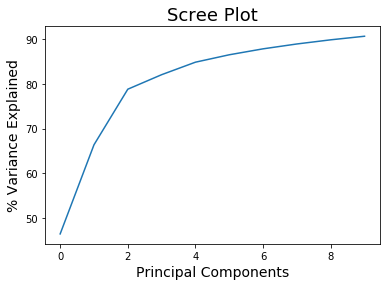

In [36]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.fit(X).transform(X) # Create a matrix X that contains the  first 5 principal components of the previous X (df_arranged.values)
scree_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(scree_var)
plt.title('Scree Plot',fontsize = 18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14)
pca.get_covariance() 

Even though 10 components will explain about 90% of the data, there isn't a defined "elbow". On the other hand, if we look at the scree plot above, it is evident that at component 2 there is a sharp elbow and at component 4 there is a slight one that defines the route followed by the line. With 4 components  little over 80% of the variance in the model is explained. That is the number of components which we will select for our data, as shown in the next cell.  

array([[  4.46489313e+00,   2.76210520e-01,  -5.84382124e-04, ...,
          2.63542896e-03,  -1.11752823e-03,   4.60473349e-02],
       [  2.76210520e-01,   4.46607227e+00,  -5.94757942e-04, ...,
          2.64395990e-03,  -1.13796762e-03,   4.61941934e-02],
       [ -5.84382124e-04,  -5.94757942e-04,   4.18927737e+00, ...,
         -8.53094522e-06,   2.04393907e-05,  -1.46858489e-04],
       ..., 
       [  2.63542896e-03,   2.64395990e-03,  -8.53094522e-06, ...,
          4.18929314e+00,  -1.65064003e-05,   4.56145069e-04],
       [ -1.11752823e-03,  -1.13796762e-03,   2.04393907e-05, ...,
         -1.65064003e-05,   4.18930726e+00,  -2.84060196e-04],
       [  4.60473349e-02,   4.61941934e-02,  -1.46858489e-04, ...,
          4.56145069e-04,  -2.84060196e-04,   4.19722511e+00]])

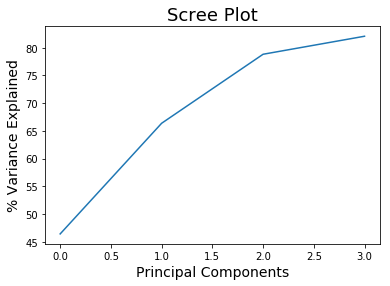

In [37]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.fit(X).transform(X) # Create a matrix X that contains the  first 5 principal components of the previous X (df_arranged.values)
scree_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(scree_var)
plt.title('Scree Plot',fontsize = 18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14)
pca.get_covariance() 

### Creation of an additional new response variable for Classifcation Task 2 data

#### Creation of new response variable for task 2

In this case, our interest resides in predicting the time in which accidents where fatalities are present happen. Therefore, for this task, first, we will create a new dataframe named **df_task2** for which we will choose the attribute **HOUR** from our "cleaned" dataframe called df_reduced as our response variable. Then, we will turn the attribute **HOUR** into a binary one, in which:

- HOUR <= 12   = 0 (Daytime)
- Hour > 13  = 1 (Nightime)

After this operation is performed, then attribute **HOUR** will be dropped from **df_task2**.

Second, the response variable we used for **TASK 1**, **FATALITIES**, will again derived from attribute **FATALS** into a binary variable with class 0 = single fatality and class 1 = multiple fatalities, and then will be included with the rest of the explanatory variables. **FATALS** then, will be also dropped from **df_task2**.

Third, we will split the explanatory variables and the response variable into two different arrays named: *X_task2* and *y_task2*. 

Finally, we will perform PCA on this new data considering that we still have 103 columns after two attributes were dropped.  

In [38]:
#create new binary HR derived from HOUR
df_task2 = df_reduced
df_task2['HR'] = 0
df_task2['HR'][df_task2['HOUR'] <= 12] = 0
df_task2['HR'][df_task2['HOUR'] > 13 ] = 1
df_task2['HR'].value_counts()

1    15150
0    13803
Name: HR, dtype: int64

Response variable **HR** isn't as imbalanced as **FATALITIES**--response for Task 1. Class 0 has 6,103 more observations than class 1. Not a dramatic or concerning difference. 

In [39]:
# Drop HOUR from dataframe
df_task2.drop('HOUR', axis= 1, inplace =True)

In [40]:
#create new binary attribute FATALITIES from FATALS
df_task2['FATALITIES'] = 0
df_task2['FATALITIES'][df_task2['FATALS'] == 1] = 0
df_task2['FATALITIES'][df_task2['FATALS'] > 1] = 1
df_task2['FATALITIES'].value_counts()

0    26795
1     2158
Name: FATALITIES, dtype: int64

In [41]:
# Drop FATALS from dataframe
df_task2.drop('FATALS', axis= 1, inplace =True)

In [42]:
if 'HR' in df_task2:
    y_task2 = df_task2['HR'].values
    del df_task2['HR']
    X_task2 = df_task2.values

#### Dimensionality reduction for Task 2: PCA

We deleted attributes **HOUR** and **FATALS**--from which **HR** and **FATALITIES** were derived-- from the dataframe **df_task2**, and then split the dataframe into an two arrays: One, storing all the explanatory variables called X_task2 and another containing the response variable for **Task 2**, **HR**, named **y_task2**, we ended up with 103 columns. 
We started PCA conservatively with 5 components to see if those will be appropriate for our new data. After looking at the scree plot below, we realized that even though 5 components will help explain 85% of the variance the last noticeable "elbow" occurred at 3 components. 

array([[  3.53266194e+00,   3.17609832e-01,  -4.66107796e-04, ...,
          2.87722219e-03,  -9.58186188e-04,   2.62260826e-02],
       [  3.17609832e-01,   3.53362198e+00,  -4.93934873e-04, ...,
          2.88968425e-03,  -1.01380176e-03,   2.61900546e-02],
       [ -4.66107796e-04,  -4.93934873e-04,   3.21554604e+00, ...,
         -1.24620615e-05,   5.56155712e-05,   3.60279780e-05],
       ..., 
       [  2.87722219e-03,   2.88968425e-03,  -1.24620615e-05, ...,
          3.21554681e+00,  -2.51364536e-05,   2.15309621e-04],
       [ -9.58186188e-04,  -1.01380176e-03,   5.56155712e-05, ...,
         -2.51364536e-05,   3.21562937e+00,   6.96974512e-05],
       [  2.62260826e-02,   2.61900546e-02,   3.60279780e-05, ...,
          2.15309621e-04,   6.96974512e-05,   3.21789186e+00]])

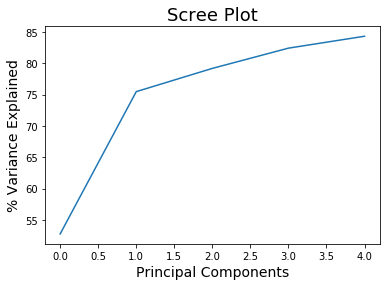

In [43]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)
X_pca_task2 = pca.fit(X_task2).transform(X_task2) # Create a matrix X that contains the  first 5 principal components of the previous X (df_arranged.values)
scree_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(scree_var)
plt.title('Scree Plot',fontsize = 18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14)
pca.get_covariance() 

In the next cell, we tried PCA with 3 components, and decided that those were appropriate for our data, since those will help explain a little over 80% of the variance. 

array([[  4.53969454e+00,   2.72986790e-01,  -5.13732553e-04, ...,
          2.50631874e-03,  -1.04945734e-03,   2.22208292e-02],
       [  2.72986790e-01,   4.54073032e+00,  -5.22053680e-04, ...,
          2.51327460e-03,  -1.06612027e-03,   2.22425243e-02],
       [ -5.13732553e-04,  -5.22053680e-04,   4.26722980e+00, ...,
         -6.95586826e-06,   1.66629271e-05,  -2.16951302e-05],
       ..., 
       [  2.50631874e-03,   2.51327460e-03,  -6.95586826e-06, ...,
          4.26724521e+00,  -1.41077231e-05,   1.98268422e-04],
       [ -1.04945734e-03,  -1.06612027e-03,   1.66629271e-05, ...,
         -1.41077231e-05,   4.26725485e+00,  -4.52409038e-05],
       [  2.22208292e-02,   2.22425243e-02,  -2.16951302e-05, ...,
          1.98268422e-04,  -4.52409038e-05,   4.26908914e+00]])

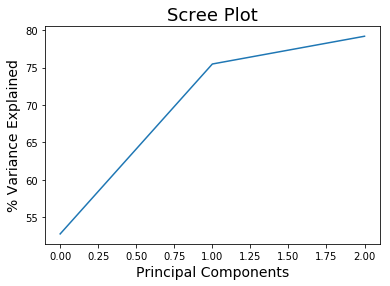

In [44]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)
X_pca_task2 = pca.fit(X_task2).transform(X_task2) # Create a matrix X that contains the  first 5 principal components of the previous X (df_arranged.values)
scree_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(scree_var)
plt.title('Scree Plot',fontsize = 18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14)
pca.get_covariance() 



<h3><b>[5 points]</b>
*Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created).* </h3> 

As we explained before we ended up with two dataframes: **df_task1** and **df_task2**. The only difference between the two resides in the response variables chosen: **df_task1** has **y**, which contains our binary **FATALITIES** where class 0 = single death and class 1 = multiple fatalities in an accident; **df_task2**, on the other hand, has **y_task2**, which contains the binary **HR**, in which class 0 = less than 12 (Daytime) and class 1 = greater or equal to 12 (Nightime). 

To get to these final data sets, we removed those attributes that did not add any useful information, could be derived from other attributes or simply added extra not needed noise to our response variables whether **FATALITIES** or **HOUR**. Those attributes that were deleted from the original data set are as follows:
<li>**ST_CASE** </li>
<li>**COUNTY**  </li>
<li>**SP_JUR**  </li>
<li>**RD_OWNER**</li>
<li>**RUR_URB** </li>
<li>**LONGITUD**</li>
<li>**LATITUDE**</li>
<li>**STATE**   </li>
<li>**FUNC_SYS** </li>
<li> **TYP_INT** </li>
<li> **NHS**     </li>
<li> **TWAY_ID** </li>
<li> **DATETIME**</li>


Then, we defined a cutoff value for some other attributes, like we explained when the operation was performed above, in which anything that has less than 10 observations was removed as those observations were not representative, and could have been considered as outliers. 

We did one-hot encoding of our categorical variables, which resulted in a dramatic increase of the number of columns (from 21 to 104).

#### df_task1

For **df_task1** we created a new ordinal attribute named **HR_RANGE**, from the original attribute **HOUR**, with six levels grouping the hours of a day, that combined with other attributes could help us determine the factors that influence that an accident could end up in a fatality (or fatalities) at a certain period of time. 

We created a new variable with two binary classes called **FATALITIES** , which was derived from our original response variable **FATALS** (a continuous variable describing the number of fatalities in a driving accident). **FATALITIES** later became **y**.  

We divided our dataframe into **X** (containing all the explanatory variables) and **y** (containing the response). 

Due to the high number of columns (104), we performed a dimensionality reduction that result in an array called **X_pca** with 4 components explaining over 80% of the variability of the data. We will use this array, along with the response variable to perform the classification and regression tasks that follow. 



#### df_task2 

For **df_task2**, overall the attributes from **df_task1** remained untouched except from **HR_RANGE** which was dropped and replaced by the original attribute **HOUR**. We included **FATALITIES**--our response variable for Task 1--as an explanatory for Task 2 and created a new binary response variable **HR**--derived from **HOUR**, which we dropped afterwards--with classes 0, representing Daytime hours and 1, reflecting nighttime ones. 

As for **df_task1**, for **df_task2** we separated the response variable **HR** into an array that was named **y_task2** and placed all the explanatory variables, which in this case contained was used to be the response for **df_task1**, **FATALITIES**, within the explanatory variables array called **X_task2**. 

For **df_task2** we ended up with 103 columns, so dimensionality reduction was performed leaving aside **y_task2**, then obtaining 3 components--contained in the array called **X_pca_task2** that explain about 80% of the variance. 

### 2.1 - Choose and explain your evaluation metrics

Our goal using the FARS dataset to classify the fatalities from fatal accidents and the hour in which the accidents occurred.

Using both the Fatalities and Hours response variables becomes a multiclass problem. The Fatalities (Fatalaties) response variable is heavily unbalanced with 26795 accidents with class 0 (one fatality), and 2158 accidents with class 2 (multiple fatalities).  The Hour (HR) response variable provides a more balanced set with 17528 class 1 (accidents occuring in the nightime), and 11425 class 0 (accidents occuring in the daytime).

Accuracy measures a fraction of the classifier’s predictions that are correct, that is the number of correct assessments divided by the number of all assessments – (TN + TP)/(TN + TP + FN + FP) (http://librimind.com). 

Accuracy will be an important measurement with our logistic regression model with the understanding that the cost parameter needs to be adjusted to reduce misclassifications. 

### 2.2 - Choose the method you will use for dividing up your data

We used a stratified shuffle split to split the data into train/test sets.  This cv object is a merge of StratifiedKFold and ShuffleSplit.  It will return stratified randomized folds, which are made by by preserving the percentage of samples for each class (http://scikit-learn.org).

After reducing the dimensions of our explanatory variables (X) data into four principal components (X_pca) and three principal components (X_pca_task2), we split the data into a training set, containing 80% of the data, and a test set containing the remaining 20%. We wanted to ensure that the subgroups of data that were split into training and testing were not only random but also proportional.  We chose the 80:20 split because it is popular and to have more training data to reduce variance.

We chose a cross-validation with 10 folds because it provides better estimates of the error, and it helps us determine the predictive power of the model. 

### Cross Validation and Training and Testing Split
This cv will be used for the Fatalaties response variable.

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Set cross-validation parameters, which is what we will use to determine the predictve power of our model.
num_cv_iterations = 10 # we ara choosing 10 folds because it provides the best estimate of error.
num_instances = len(y)

# Now split data into Training (80%) and Test (20%) data sets

cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2) # we use stratified to make sure that 
# train and test data contains important information on both

print(cv_object)


StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None)


### 2.3 - Create three different classification/regression models

1. Logistic Regression with Fatalities as response variable and Logistic Regression with Hour as response variable
2. Classification 1 with Fatalities as response variable (RF and KNN)
3. Classification 2 with Hour as response variable (RF and KNN)

### Logistic Regression with Fatalities as Response Variable

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Create logistic regrssion object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) #We will start with a cost of 1.0 and then compare
# with a model with a lower cost later on

#We decided to use this code from notebook 04 because it is clear what it does, and how it does it. 
iter_num=0 
for train_indices, test_indices in cv_object.split(X_pca,y): 
    X_train = X_pca[train_indices]
    y_train = y[train_indices]
    
    X_test = X_pca[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)  # here we use our train data to fit the logistic regression
    y_hat = lr_clf.predict(X_test) # and we use test data to predict

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.9216024866171646)
('confusion matrix\n', array([[5327,   32],
       [ 422,   10]]))
('====Iteration', 1, ' ====')
('accuracy', 0.92384734933517532)
('confusion matrix\n', array([[5340,   19],
       [ 422,   10]]))
('====Iteration', 2, ' ====')
('accuracy', 0.92332930409255742)
('confusion matrix\n', array([[5336,   23],
       [ 421,   11]]))
('====Iteration', 3, ' ====')
('accuracy', 0.92384734933517532)
('confusion matrix\n', array([[5345,   14],
       [ 427,    5]]))
('====Iteration', 4, ' ====')
('accuracy', 0.92263857710240027)
('confusion matrix\n', array([[5334,   25],
       [ 423,    9]]))
('====Iteration', 5, ' ====')
('accuracy', 0.9216024866171646)
('confusion matrix\n', array([[5329,   30],
       [ 424,    8]]))
('====Iteration', 6, ' ====')
('accuracy', 0.92263857710240027)
('confusion matrix\n', array([[5336,   23],
       [ 425,    7]]))
('====Iteration', 7, ' ====')
('accuracy', 0.92315662234501816)
('confusion matrix\n'

Results:  Our accuracy is high, which may be due to our response variable having a greater number of zeros (more than 20,000) than ones (about 1,600)

#### Logistic Regression with Fatalaties response variable change parameter(s)

Changing the cost parameter using three different values (100, 1, 0.01) and the penalties L1 and L2 to determine if the false negatives and the accuracy changes. 

In [47]:
#Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X_train,y_train)
    clf_l2_LR.fit(X_train,y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X_train,y_train))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X_train,y_train))
    
    y_hat_l1 = clf_l1_LR.predict(X_test)
    y_hat_l2 = clf_l2_LR.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_l1)
    conf = mt.confusion_matrix(y_test,y_hat_l1)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    acc = mt.accuracy_score(y_test,y_hat_l2)
    conf = mt.confusion_matrix(y_test,y_hat_l2)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)

C=100.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.9234
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9234
('====Iteration', 10, ' ====')
('accuracy', 0.92350198584009668)
('confusion matrix\n', array([[5339,   20],
       [ 423,    9]]))
('====Iteration', 10, ' ====')
('accuracy', 0.92332930409255742)
('confusion matrix\n', array([[5339,   20],
       [ 424,    8]]))
C=1.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.9234
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9234
('====Iteration', 10, ' ====')
('accuracy', 0.92350198584009668)
('confusion matrix\n', array([[5339,   20],
       [ 423,    9]]))
('====Iteration', 10, ' ====')
('accuracy', 0.92332930409255742)
('confusion matrix\n', array([[5339,   20],
       [ 424,    8]]))
C=0.01
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.9237
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9232
('====Iteration', 10, ' ====')
('accuracy', 0.92367466758763594)
('confusion 

Whether the cost parameter is high or low (ie. c = 100 or c = 0.01) the accuracy is about the same 92.2%; however, in the confusion matrix we see that when cost is low (ie. c = 0.01) we run the risk of misclassifications of class 1 due to the imbalance of the response variable where Class 1 responses may be ignored because they make up only about 7% of the fatalities.

### Cross Validation and Training and Testing Split 2

This cv will be used for the **HR** response variable.

In [48]:
#Splitting the train/test differently due to the more balanced data for the Hour response variable

# Set cross-validation parameters, which is what we will use to determine the predictve power of our model.
num_cv_iterations = 10 # we ara choosing 10 folds because it provides the best estimate of error.
num_instances = len(y_task2)

# Now split data into Training (70%) and Test (20%) data sets

cv_object2 = StratifiedShuffleSplit(n_splits = num_cv_iterations, test_size = 0.2) # we use stratified to make sure that 
# train and test data contains important information on both

print(cv_object2)


StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.2,
            train_size=None)


### Logistic Regression with HR as Response Variable

Since we are using our other response variable, we created a new logistic regression object called "lr_clf2" we will be able to fit our training data, which will be now stored in new variables: X_train2 containing our three chosen components as the explanatory variable and y_train2 containing the response variable **HR**, and use the test data, also contained in new variables: X_test2 (explanatory) and y_test2 (response), which we will use to predict by creating an object called y_hat2.

Also, we will use the test response variable y_test2 and the object y_hat2 to calculate the accuracy score and the confusion matrices based on the 10 folds that we selected for the cross validation object called cv_object2. 

In [49]:
# Create logistic regrssion object
lr_clf2 = LogisticRegression(penalty='l2', C=1.0, class_weight=None) #We will start with a cost of 1.0 and then compare
# with a model with a lower cost later on

#We decided to use this code from notebook 04 because it is clear what it does, and how it does it. 
iter_num=0 
for train_indices, test_indices in cv_object2.split(X_pca_task2,y_task2): 
    X_train2 = X_pca_task2[train_indices]
    y_train2 = y_task2[train_indices]
    
    X_test2 = X_pca_task2[test_indices]
    y_test2 = y_task2[test_indices]
    
    lr_clf2.fit(X_train2,y_train2)  # here we use our train data to fit the logistic regression
    y_hat2 = lr_clf2.predict(X_test2) # and we use test data to predict

    acc = mt.accuracy_score(y_test2,y_hat2)
    conf = mt.confusion_matrix(y_test2,y_hat2)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

('====Iteration', 0, ' ====')
('accuracy', 0.52443446727680887)
('confusion matrix\n', array([[ 176, 2585],
       [ 169, 2861]]))
('====Iteration', 1, ' ====')
('accuracy', 0.52339837679157308)
('confusion matrix\n', array([[   7, 2754],
       [   6, 3024]]))
('====Iteration', 2, ' ====')
('accuracy', 0.52270764980141604)
('confusion matrix\n', array([[ 358, 2403],
       [ 361, 2669]]))
('====Iteration', 3, ' ====')
('accuracy', 0.52339837679157308)
('confusion matrix\n', array([[   2, 2759],
       [   1, 3029]]))
('====Iteration', 4, ' ====')
('accuracy', 0.51942669659816953)
('confusion matrix\n', array([[  96, 2665],
       [ 118, 2912]]))
('====Iteration', 5, ' ====')
('accuracy', 0.5228803315489553)
('confusion matrix\n', array([[  14, 2747],
       [  16, 3014]]))
('====Iteration', 6, ' ====')
('accuracy', 0.52305301329649456)
('confusion matrix\n', array([[ 291, 2470],
       [ 292, 2738]]))
('====Iteration', 7, ' ====')
('accuracy', 0.52408910378173024)
('confusion matrix\n

Interesting enough, iterations 6, 7 and 9 provided the higher number of True Positives, False Positives, False Negatives and True Negatives, whereas the rest of the iterations were visibly low in the number of True Positives and False Positives. We suppose these were less "sensitive" and had less specificity than the rest. 

#### Logistic Regression with Hour response variable change parameter(s)

Changing the cost parameter to determine if the false negatives and the accuracy changes when the cost is high, medium or low. For this model we are using two different penalties: L1 and L2 along with three different values for C (100, 1, 0.01).

In [50]:
#Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR_2 = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR_2 = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR_2.fit(X_train2,y_train2)
    clf_l2_LR_2.fit(X_train2,y_train2)

    coef_l1_LR_2 = clf_l1_LR_2.coef_.ravel()
    coef_l2_LR_2 = clf_l2_LR_2.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR_2 = np.mean(coef_l1_LR_2 == 0) * 100
    sparsity_l2_LR_2 = np.mean(coef_l2_LR_2 == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR_2)
    print("score with L1 penalty: %.4f" % clf_l1_LR_2.score(X_train2,y_train2))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR_2)
    print("score with L2 penalty: %.4f" % clf_l2_LR_2.score(X_train2,y_train2))
    
    y_hat_l1_2 = clf_l1_LR_2.predict(X_test2)
    y_hat_l2_2 = clf_l2_LR_2.predict(X_test2)
    
    acc = mt.accuracy_score(y_test2,y_hat_l1_2)
    conf = mt.confusion_matrix(y_test2,y_hat_l1_2)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    acc = mt.accuracy_score(y_test2,y_hat_l2_2)
    conf = mt.confusion_matrix(y_test2,y_hat_l2_2)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)

C=100.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.5236
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.5235
('====Iteration', 10, ' ====')
('accuracy', 0.5228803315489553)
('confusion matrix\n', array([[   7, 2754],
       [   9, 3021]]))
('====Iteration', 10, ' ====')
('accuracy', 0.5228803315489553)
('confusion matrix\n', array([[   7, 2754],
       [   9, 3021]]))
C=1.00
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.5236
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.5235
('====Iteration', 10, ' ====')
('accuracy', 0.5228803315489553)
('confusion matrix\n', array([[   7, 2754],
       [   9, 3021]]))
('====Iteration', 10, ' ====')
('accuracy', 0.5228803315489553)
('confusion matrix\n', array([[   7, 2754],
       [   9, 3021]]))
C=0.01
Sparsity with L1 penalty: 0.00%
score with L1 penalty: 0.5237
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.5235
('====Iteration', 10, ' ====')
('accuracy', 0.52339837679157308)
('confusion matr

When C = 100 there is no difference between L1 and L2, as both provide a score 0f 0.53. When C = 1.0, there is an insignificant difference of 0.01 between L1 and L2, where L1 score is of 0.54, and L2 score, 0.53. When C = 0.01, interesting enough L2 displays a score of 0.53, while L1 score if of 0.52, still a minimal difference of 0.01. 

L2 penalty offers a greater sparsity without reducing the predictive power of the model.

### Classification Task 1 - Random Forest and KNeighbors with Fatalities as Response Variable

#### Task 1: KNeighbors with Fatalities as Response Variable
We run ten iterations in order to compare the mean average of accuracy between runs (parameter changes) and between classification models in section 2.5.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighbors with Fatalities

# These will be used for Classifcation RF & KNN 
X = X_pca
yhat = np.zeros(y.shape)

# get a handle to the classifier object, which defines the type
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter_num=0
total_acc=0
for train, test in cv_object.split(X,y):
    clf_KNN.fit(X[train],y[train])
    yhat[test] = clf_KNN.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('KNN accuracy', total_accuracy)
    iter_num+=1

acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('KNN accuracy', 0.92380755016751281)
('KNN accuracy', 0.92252961696542668)
('KNN accuracy', 0.92149345490968115)
('KNN accuracy', 0.92087175767623386)
('KNN accuracy', 0.91952474700376474)
('KNN accuracy', 0.91900666597589198)
('KNN accuracy', 0.91859220115359375)
('KNN accuracy', 0.91835043000725314)
('KNN accuracy', 0.91779781024418883)
('KNN accuracy', 0.918005042655338)
('average accuracy:', 0.9199979276758885)


#### Task 1: Random Forest with Fatalaties as Response Variable
We run ten iterations in order to compare the mean average of accuracy between runs (parameter changes) and between classification models in section 2.5.

In [52]:
# Random Forest with Fatalities
from sklearn.ensemble import RandomForestClassifier

# get a handle to the classifier object, which defines the type
clf_RF = RandomForestClassifier(n_estimators = 100)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object.split(X,y):
    clf_RF.fit(X[train],y[train])
    yhat[test] = clf_RF.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('RF accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('RF accuracy', 0.91686526439401794)
('RF accuracy', 0.91510378889925048)
('RF accuracy', 0.91382585569716435)
('RF accuracy', 0.91261699996546131)
('RF accuracy', 0.91278969364141882)
('RF accuracy', 0.91334231340448313)
('RF accuracy', 0.9123061513487376)
('RF accuracy', 0.91202984146720545)
('RF accuracy', 0.91209891893758854)
('RF accuracy', 0.91154629917452423)
('average accuracy:', 0.91325251269298524)


#### Task 1: KNN parameter change
Change n_neighbors to 25 (keeping it odd) and checking to see if scaling the data set makes a difference

In [53]:
# Change n_neighbors to 25 (keeping it odd)

from sklearn.preprocessing import StandardScaler

# KNeighbors with Fatalities

# These will be used for Classifcation RF & KNN 
X = X_pca
yhat = np.zeros(y.shape)

#Scaling
scl = StandardScaler()
X = scl.fit_transform(X)

# get a handle to the classifier object, which defines the type
clf_KNN = KNeighborsClassifier(n_neighbors=25)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object.split(X,y):
    clf_KNN.fit(X[train],y[train])
    yhat[test] = clf_KNN.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('KNN accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('KNN accuracy', 0.92546540945670575)
('KNN accuracy', 0.92556902566228028)
('KNN accuracy', 0.92556902566228028)
('KNN accuracy', 0.92556902566228028)
('KNN accuracy', 0.92539633198632265)
('KNN accuracy', 0.9253617932511311)
('KNN accuracy', 0.92529271578074812)
('KNN accuracy', 0.9251200221047905)
('KNN accuracy', 0.92522363831036503)
('KNN accuracy', 0.92522363831036503)
('average accuracy:', 0.92537906261872693)


#### Task 1: RF parameter change
Change n_estimators to 150

In [54]:
# Change n_estimators to 150

# get a handle to the classifier object, which defines the type
clf_RF = RandomForestClassifier(n_estimators = 150)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object.split(X,y):
    clf_RF.fit(X[train],y[train])
    yhat[test] = clf_RF.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('RF accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('RF accuracy', 0.92187338099678795)
('RF accuracy', 0.9197319794149138)
('RF accuracy', 0.91835043000725314)
('RF accuracy', 0.91693434186440093)
('RF accuracy', 0.91524194384001656)
('RF accuracy', 0.91358408455082374)
('RF accuracy', 0.91310054225814252)
('RF accuracy', 0.91261699996546131)
('RF accuracy', 0.91227161261354606)
('RF accuracy', 0.91161537664490722)
('average accuracy:', 0.91553206921562524)


### Classifcation Task 2  - Random Forest and KNeighbors with HR as Response Variable

#### Task 2: KNeighbors with HR as Response Variable

In [55]:
# KNeighbors with Hour

# These will be used for Classifcation RF & KNN 
X = X_pca_task2
y = y_task2
yhat = np.zeros(y_task2.shape)

# get a handle to the classifier object, which defines the type
clf_KNN = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object2.split(X,y):
    clf_KNN.fit(X[train],y[train])
    yhat[test] = clf_KNN.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('KNN accuracy', total_accuracy)
    iter_num+=1

acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('KNN accuracy', 0.4903464235139709)
('KNN accuracy', 0.50060442786585158)
('KNN accuracy', 0.50903187925258175)
('KNN accuracy', 0.51296929506441469)
('KNN accuracy', 0.51960073222118608)
('KNN accuracy', 0.52295098953476327)
('KNN accuracy', 0.52754464131523504)
('KNN accuracy', 0.53027320139536493)
('KNN accuracy', 0.53279452906434566)
('KNN accuracy', 0.5352467792629434)
('average accuracy:', 0.51813628984906557)


#### Task 2: Random Forest with HR as Response Variable

In [56]:
# Random Forest with Hour

# get a handle to the classifier object, which defines the type
clf_RF = RandomForestClassifier(n_estimators = 100)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object2.split(X,y):
    clf_RF.fit(X[train],y[train])
    yhat[test] = clf_RF.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('RF accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('RF accuracy', 0.53828618795979688)
('RF accuracy', 0.54063482195282009)
('RF accuracy', 0.54405415673678026)
('RF accuracy', 0.54640279072980347)
('RF accuracy', 0.54695541049286778)
('RF accuracy', 0.54719718163920839)
('RF accuracy', 0.54885504092840121)
('RF accuracy', 0.55054743895278557)
('RF accuracy', 0.55009843539529579)
('RF accuracy', 0.55089282630470071)
('average accuracy:', 0.54639242910924601)


#### Task 2: KNN parameter change
Change n_neighbors to 7 (keeping it odd)

In [57]:
# Change n_neighbors to 7 (keeping it odd)

# These will be used for Classifcation RF & KNN 
X = X_pca_task2
y = y_task2
yhat = np.zeros(y_task2.shape)

# get a handle to the classifier object, which defines the type
clf_KNN = KNeighborsClassifier(n_neighbors=7)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object2.split(X,y):
    clf_KNN.fit(X[train],y[train])
    yhat[test] = clf_KNN.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('KNN accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('KNN accuracy', 0.49117535315856731)
('KNN accuracy', 0.50267675197734263)
('KNN accuracy', 0.51397091838496878)
('KNN accuracy', 0.52312368321072078)
('KNN accuracy', 0.52844264843021449)
('KNN accuracy', 0.5325182191828135)
('KNN accuracy', 0.53490139191102826)
('KNN accuracy', 0.53800987807826472)
('KNN accuracy', 0.54035851207128793)
('KNN accuracy', 0.54263806859392805)
('average accuracy:', 0.5247815424999136)


#### Task 2: RF parameter change
Change n_estimators to 200

In [58]:
# Change n_estimators to 200

# get a handle to the classifier object, which defines the type
clf_RF = RandomForestClassifier(n_estimators = 200)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
iter=0
total_acc=0
for train, test in cv_object2.split(X,y):
    clf_RF.fit(X[train],y[train])
    yhat[test] = clf_RF.predict(X[test])

    total_accuracy = mt.accuracy_score(y, yhat)
    total_acc+=total_accuracy
    print ('RF accuracy', total_accuracy)
    iter_num+=1
    
acc_avg=total_acc/10
print ('average accuracy:',acc_avg)

('RF accuracy', 0.54553932235001557)
('RF accuracy', 0.54781887887265568)
('RF accuracy', 0.54685179428729325)
('RF accuracy', 0.54526301246848341)
('RF accuracy', 0.54781887887265568)
('RF accuracy', 0.54664456187614408)
('RF accuracy', 0.54868234725244358)
('RF accuracy', 0.54885504092840121)
('RF accuracy', 0.54975304804338065)
('RF accuracy', 0.55016751286567889)
('average accuracy:', 0.54773943978171524)


### 2.4 - Analyze the results using your chosen method of evaluation

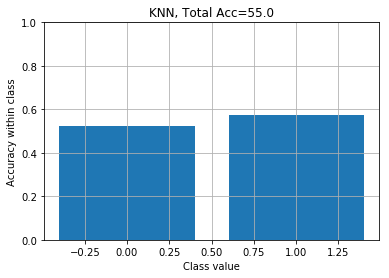

In [59]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

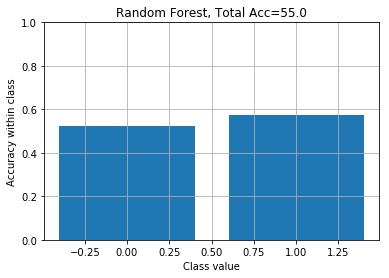

In [60]:
plot_class_acc(y,yhat,title="Random Forest")

Both the KNN and Random Forest performed similarly on the data set, with neither biased toward a particular class. It is at once heartening and disappointing as though clearly the models work, their performance is lackluster.

### 2.5 - Discuss the advantages of each model
#### *Discuss the advantages of each model for each classification task, if any. If there are no advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques - be sure they are appropriate for your chosen method of validation. (10 points total).*

##### Background Information:
Resources:  *Introduction to Machine Learning with Python* and [Quora](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms).

#### K - Nearest Neighbors Algorithm (KNN)

The most important parameters in KNN is the number of neighbors and how the distance between points are measured. One of the strengths of KNN is that it is more simplistic and provides results that don't need to be adjusted many times.  It provides a good starting point for more complicated and advanced models.  Scaling the dataset is needed when different units are present.  Performing a PCA and avoiding very sparse datasets can improve the results of KNN. 

#### Random Forest Algorithm (RF)

Random Forrest widely used in machine learning and it works well without a lot of heavy tuning of parameters.  It also doesn't require scaling the data.  You are able to build a RF, which is a bunch of decision trees, in parallel which allows it to work well on large datasets. However, RF is memory intensive and slow to train and predict compared to linear algorithms. In addition, they do not perform well on high dimensional, sparse data compared to Naive Bayes.  It is important to note that the parameters, such as number of estimators, is important when running RF.  A higher number of estimaters is better, but requires more time and memory. 

##### Our Assessment:
We compared the LR output (first run versus second run with parameter changes), KNN output (first run versus second run with parameter changes), the RF output ((first run versus second run with parameter changes), and the KNN most accurate output with the LR most accurate output by running TTests in SAS.  Our conclusion for all comparisons were that none of them were statistically significant.   

Fatalities Response Variable:
LR1 vs LR2 (average) = T-statistic = 0.0002
KNN1 (n_neighbors=5) vs KNN2 (n_neighbors=25) - T-statistic = 0.0019
RF1 (n_estimators = 100) vs RF2 (n_estimators = 150) - T-statistic = 0.0009

Hour Response Variable:
LR1 vs LR2 (average) = T-statistic = 0.0009
KNN1 (n_neighbors=3) vs KNN2 (n_neighbors=7) - T-statistic = 0.0009
RF1 (n_estimators = 100) vs RF2 (n_estimators = 200) - T-statistic = 0.0027

Most Accurate - Fatalaties Response Variable
KNN1 (n_neighbors = 25) vs LR1 (C=1.0) - T-statistic = 0.0007

Figure 1 illustrates the SAS Ouput results for T-Test between the most accurate KNN to the most accurate LR for the response variable Fatalities.

![SAS_KNN_vs_LR](SAS_KNN_vs_LR.png "SAS Output KNN vs LR Response Variable = Fatalities") 
<p style='text-align: center;'>
Figure 1. SAS Output
</p>

Although, the accuracy differences were not statistically different, the performance (run time) for the KNeighbors was faster than the Random Forest.

Comparing the Response Variables, the Fatalaties response variable was more accurate than the Hour response variable.  Comparing the second run of KNN (n_neighbors = 25) for the Fatalities response variable mean accuracy to the second run of KNN (n_neigbors = 7) for the Hour response varialbe mean accuracy, there was a significant difference (T-statistic = 0.1731, 95% confidence) (See Figure 2).

![SAS_KNNF_vs_KNNH](SAS_KNN_1_vs_KNN_2.png "SAS Output KNN Fatalatiies vs KNN Hour") 
<p style='text-align: center;'>
Figure 2. SAS Output
</p>


### 2.6 - Which attributes from your analysis are most important?

#### Logistic Regression
Considering that we reduced the dimensionality of our data using PCA selecting only four principal components that later were used to split data into training and test sets, which in turn were used to pass through the logistic regression object, it seems adequate to calculate the weights of those four components that are now part of the train set (X_train) in order to decide if all of them are worth keeping and if their presence do not cause an overfitting of the model.

#### Logistic Regression with Fatalities as Response Variable - weights

Since our dataframe **df_task1**, from which **FATALITIES** or **y** is the response variable was reduced using PCA to only 4 components, we decided it was indispensable to get the weights of each of those components to determine their influence. 

In [61]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T 
variable_names = X_train
for coef, name in zip(weights,variable_names):
    print(name, 'This principal component from the training data has weight of', round(coef[0],2))

(array([-1.71686021,  1.13674501,  2.78865833, -0.61995132]), 'This principal component from the training data has weight of', 0.18)
(array([-2.72108962,  0.2404349 ,  1.79932863, -0.56378588]), 'This principal component from the training data has weight of', 0.11)
(array([ 2.54187449, -3.82136085, -0.03280968,  0.05496253]), 'This principal component from the training data has weight of', 0.05)
(array([ 0.59269324,  2.72247686, -2.30580031, -0.27336713]), 'This principal component from the training data has weight of', -0.34)


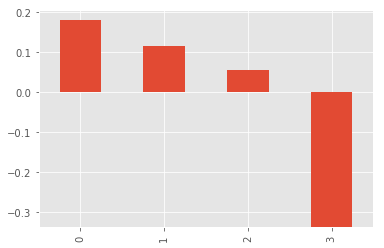

In [62]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0])
weights.plot(kind='bar')
plt.show()

First and foremost, it is important to note that the components are numbered from 0 to 3, although we will refer to them as: Component 1 (0), Component 2 (1), Component 3 (2) and Component 4 (3). 

From the weights and the plot it is evident that the first 3 components are not as "heavy"--with weights of 0.17, 0.11, 0.06, respectively--, as the fourth one that with a weight of -0.38 has the strongest negative correlation. Component 3, on the other hand, even though is positive displays the weakest correlation at 0.06.

With this numbers, we dare to affirm that Component 4 is the most important of them all, followed by Component 1. 

#### Logistic Regression with Hour as Response Variable - weights

In order to determine which principal component is the most important when using the response variabe **HR** or **y_task2**, we again decided to calculate the weights of each. 

In [63]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf2.coef_.T 
variable_names = X_train
for coef, name in zip(weights,variable_names):
    print(name, 'This principal component from the training data has weight of', round(coef[0],2))

(array([-1.71686021,  1.13674501,  2.78865833, -0.61995132]), 'This principal component from the training data has weight of', 0.01)
(array([-2.72108962,  0.2404349 ,  1.79932863, -0.56378588]), 'This principal component from the training data has weight of', 0.02)
(array([ 2.54187449, -3.82136085, -0.03280968,  0.05496253]), 'This principal component from the training data has weight of', 0.08)


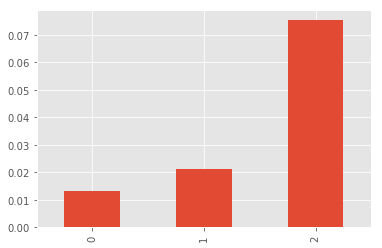

In [64]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf2.coef_[0])
weights.plot(kind='bar')
plt.show()

Same case as when we did the weights for **FATALITIES** where components are numbered from 0 to 3, and we will refer to them as: Component 1 (0), Component 2 (1), Component 3 (2) and Component 4 (3). 

In the case of the response **HR** or **y_task2** Component 3 shows the strongest positive correlation with a weight of 0.09. We could say that this component is the most important one, based only on its weight compared to the weights of the other components, but still it shows a weak positive correlation, which makes it difficult for us to determine its real importance. 

## 3 - Deployment


### 3.1 - How useful is your model?

The logic regression model (the one which is more accurate) could be used to predict if an accident would result in more than one fatality; However, all of the data reported in the FARS dataset are only those accidents that resulted in a death.  Therefore, it may not be as useful as examining more specific details about an accident to determine the severity of injuries or the conditions that allowed someone to survive in the same or similar circumstances.

Nevertheless, considering that the attributes that we selected for this analysis are deeply related to the causes and the circumstances surrounding an accident where a fatality or fatalities are present--such as the type weather, the lighting conditions, the type of road, if occurred at an intersection, a main artery, the hour range, etc.-- we can say that the model could be useful for:

Law enforcement and cities: to determine where and when most accidents where fatalities occur happen and therefore, allocate more personnel (whether officers or rescue) to those; allocate resources to place better sign postings, install new street lights, etc. to prevent people from dying in a car accident in places and at times where is recurrent. Also to create awareness campaings and PSA's (in the mdeia, traiditonal and digital) to alert people of the conditions, times and places where these kind of events tend to happen more frequently and provide the public with ways to protect themselves at certain times, certain types of roads and weather and lighting conditions, among others, so that they won't become an statistic. 

### 3.2 - How would you measure the model's value?

The model's value isn't as valuable after the fact.  More data needs to be collected in order to provide a more educated and informed prediction such as the car type, the age and gender of the driver, the number of vehicle occupants--their ages, genders, etc.--,among others, that will provide with high accuracy, the relation of the elements that can be helpful not only to predict a fatal accident but to prevent it. This will be the kind of prediction that would be most useful for any insurance company, law enforcement, car makers, cities and the public in general.

The value of the logistic regression model allows for the prediction that an accident with specific components would result in either a single or multiple fatalities, but again, the reported data only takes into account accidents where fatalities were involved so we cannot compare if a particular intersection or highway or a certain type of weather or lighting condition had more people death than surviving and therefore, we cannot determine the reasons why someone did or did not survive.  

### 3.3 - How would you deploy your model?

The model could be deployed through a website and the parameters could be interactive. It could allow filtering by geographic area by adding simple code to the data frame manipulation script. A comparison tool could also be implemented when the data is updated in order to compared trends of root causes of fatal traffic accidents over time and illustrate changes in methodology.

### 3.4 - What other data should be collected?


As we already mentioned before some additional attributes that should be collected would be safety features of the automobiles involved in the accident, such as make, model, and year as well as human attributes such as the drivers' age and gender may also be good data that would make for data that could be added to the model. 

In addition to the data collected through FARS, additional data could be captured such as non-fatal accidents.  Understading what attributes result in one or more fatalities, is just as important as understading what attributes of an accident did not result in a fatality.  Having all of the data for all accidents for a particular area would allow for analysis to predict what attributes make up a "perfect storm" that would contribute to a fatality.


### 3.5 - How often would the model need to be updated?

The model would need to be updated as frequently as new data attributes could be added to the data set.  For example, safety features of automobiles are continuing to evolve. Same if new transit regulations are enforced, such as the prohibition of cell phone usage while driving, from which the data set has no information yet. It would be interesting to know how many of those fatalities were the result of that. Therefore, the model would need to be flexible when these types of changes happen. 

Most of the data in the FARS dataset is not as susceptible to trends so if the model is to be used on the data as it is reported and captured for FARS, then the model wouldn't need to updated as often; hence it wouldn't be as valuable either.

### 4 - Exceptional Work

As an extension of this project, we will look at predictors of passenger deaths. This will be when fatalities are greater than the number of vehicles involved and excluding incidents involving pedestrians. Because this metric is not broken out, our approximation guarantees that at least one of the fatalities was a passenger, though other accidents may have resulted in a passenger death as well. This approximation yields 888 incidents of about 23,000 or 4%. This analysis will most likely suffer from the same issue as the previous ones with such an unbalanced response class. We will explore how Naive Bayes performs in such a situation compared to a Random Forest. Naive Bayes is considered quite weak when faced with unbalanced classes versus a strong technique in Random Forest.

First, we will manipulate our data set to give us what we need in order to train for this particular endeavor.

In [65]:
print ('The number of rows is       ', df_passenger.shape[0])
print ('The number of attributes is ', df_passenger.shape[1])

df_passenger = df_passenger[df_passenger.PEDS == 0]
print ('Dimensions of Data Frame excluding Pedestrian Incidents')
print ('The number of rows is       ', df_passenger.shape[0])
print ('The number of attributes is ', df_passenger.shape[1])

df_passenger['PASS_FATAL'] = 0
df_passenger['PASS_FATAL'][df_passenger['FATALS'] > df_passenger['VE_FORMS']] = 1
if 'FATALS' in df_passenger:
    del df_passenger['FATALS'] 
print ('Dimensions of Data Frame with Passenger Fatalities')
print ('The number of rows is       ', df_passenger.shape[0])
print ('The number of attributes is ', df_passenger.shape[1])

('The number of rows is       ', 28953)
('The number of attributes is ', 104)
Dimensions of Data Frame excluding Pedestrian Incidents
('The number of rows is       ', 23383)
('The number of attributes is ', 104)
Dimensions of Data Frame with Passenger Fatalities
('The number of rows is       ', 23383)
('The number of attributes is ', 104)


('Numer of positive observations: ', 888)
('Pipeline accuracy', 0.96202369242612151)
('confusion matrix\n', array([[22495,     0],
       [  888,     0]]))


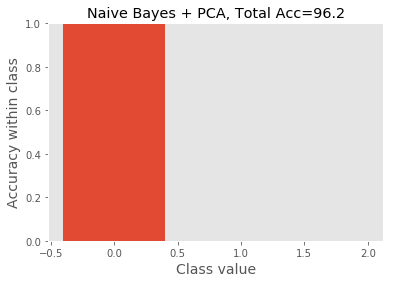

In [66]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn import metrics as mt

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

positive = df_passenger['PASS_FATAL'].sum()
print ('Numer of positive observations: ', positive)
    
y = df_passenger['PASS_FATAL'].values
del df_passenger['PASS_FATAL']
X = df_passenger.values    
    
pca = PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.fit(X).transform(X) # Create a matrix X that contains the  first 5 principal components of the previous X (df_arranged.values)
scree_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(scree_var)
plt.title('Scree Plot',fontsize = 18)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('% Variance Explained', fontsize=14)
pca.get_covariance() 
    
cv = StratifiedKFold(n_splits=100)
yhat = np.zeros(y.shape)

# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=3,svd_solver='auto')),
     ('CLF',GaussianNB())]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
 
conf = mt.confusion_matrix(y,yhat)    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
print("confusion matrix\n",conf) 
plot_class_acc(y,yhat,title="Naive Bayes + PCA")

The Naive Bayes classifier on the PCA components did not perform well. The 96% accuracy belies the bias in the data set with only 888 positives of 23,000 observations (4%). The classifier clearly labeled every observation as negative, hence the 100% accuracy for the negative class and 0% accuracy for the positive class on the confusion matrix and chart above. This is not surprising as our classes are very uneven and is one of the weaknesses of Naive Bayes since it assesses the probability of each predictor independently based on its probability. Any given predictor is almost guaranteed to be "hot" in a negative obeservation with 23,000 observations, and only strong correlations will be able to overcome the scale difference. For example, if one predictor is true in only 5% of the negative values and 100% of the postive values, it will still have a negative probability of 56% (1,150/2,038). This makes Naive Bayes especially weak to unbalanced classes of this magnitude.

Let's see if Random Forest performs better.

In [67]:
# get a handle to the classifier object, which defines the type
clf_RF = RandomForestClassifier(n_estimators = 50
                                ,class_weight ='balanced')

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv_object.split(X,y):
    clf_RF.fit(X[train],y[train])
    yhat[test] = clf_RF.predict(X[test])

conf = mt.confusion_matrix(y,yhat)    
total_accuracy = mt.accuracy_score(y, yhat) 
print("confusion matrix\n",conf) 
print ('RF accuracy', total_accuracy)

('confusion matrix\n', array([[22325,   170],
       [  848,    40]]))
('RF accuracy', 0.95646409784886455)


The random forest classifier fared marginally better, but still falls victim to the unbalanced classes, even when setting the class_weight parameter to balanced. In this case, the postive signal in each component may be drowned out by the noise created by the sheer volume of negative responses and their respective variance. 

The conclusion can be drawn at this point that main contributors to this difference may lie outside of the scope of the collected information or that more data will need to be collected in order to clearly define what predicts passenger deaths under these conditions.